In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(file_path):
    """
    Load data from a CSV file and return a DataFrame.
    
    :param file_path: Path to the CSV file.
    :return: DataFrame containing the loaded data.
    """
    try:
        df = pd.read_csv(file_path, sep=',', skiprows=0)
                         #names=['Data Point','Date Time',Test Time (s),Step Time (s),Cycle Index,Step Index,TC_Counter1,Current (A),Voltage (V),'Power (W)',Charge Capacity (Ah),Discharge Capacity (Ah),Charge Energy (Wh),Discharge Energy (Wh),Capacity (Ah),mAh/g,ACR (Ohm),dV/dt (V/s),Internal Resistance (Ohm),dQ/dV (Ah/V),dV/dQ (V/Ah),Aux_Temperature_1 (C),Aux_dT/dt_1 (C/s)],)
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None
    
ocv1 = load_data(r"C:\Users\ogodh\Documents\Revolve\Python\OCV_25\OCV_test_25grader_celle_1.CSV")
ocv2 = load_data(r"C:\Users\ogodh\Documents\Revolve\Python\OCV_25\OCV_test_25grader_celle_2.CSV")
ocv3 = load_data(r"C:\Users\ogodh\Documents\Revolve\Python\OCV_25\OCV_test_25grader_celle_3.CSV")

print("Keys:", ocv1.keys())
print("First 5 rows:")
print(ocv1.head())





Keys: Index(['Data Point', 'Date Time', 'Test Time (s)', 'Step Time (s)',
       'Cycle Index', 'Step Index', 'TC_Counter1', 'Current (A)',
       'Voltage (V)', 'Power (W)', 'Charge Capacity (Ah)',
       'Discharge Capacity (Ah)', 'Charge Energy (Wh)',
       'Discharge Energy (Wh)', 'Capacity (Ah)', 'mAh/g', 'ACR (Ohm)',
       'dV/dt (V/s)', 'Internal Resistance (Ohm)', 'dQ/dV (Ah/V)',
       'dV/dQ (V/Ah)', 'Aux_Temperature_1 (C)', 'Aux_dT/dt_1 (C/s)'],
      dtype='object')
First 5 rows:
   Data Point                  Date Time  Test Time (s)  Step Time (s)  \
0           1  \t03/04/2025 12:26:15.288        60.0008        60.0008   
1           2  \t03/04/2025 12:27:15.289       120.0015       120.0015   
2           3  \t03/04/2025 12:27:34.987       139.6994       139.6994   
3           4  \t03/04/2025 12:27:46.184       139.7246       139.7246   
4           5  \t03/04/2025 12:27:46.369       139.9093         0.1487   

   Cycle Index  Step Index  TC_Counter1  Current (A)  Vo

In [20]:
# Helper function to reset index and add a new column counter
def reset_and_add_counter(df, counter_name, ascending=True):
    df = df.reset_index(drop=True)
    if ascending:
        df[counter_name] = np.arange(len(df))
    else:
        df[counter_name] = np.arange(len(df)-1, -1, -1)
    return df

# For ocv1
discharge1_1 = ocv1[(ocv1['Current (A)'] < 0) & (ocv1.index < ocv1[ocv1['Current (A)'] > 0].index.min())]
charge_1 = ocv1[(ocv1['Current (A)'] > 0)]
discharge2_1 = ocv1[(ocv1['Current (A)'] < 0) & (ocv1.index > charge_1.index.max())]

discharge1_1 = reset_and_add_counter(discharge1_1, 'cycle_counter', ascending=True)
charge_1 = reset_and_add_counter(charge_1, 'cycle_counter', ascending=False)
discharge2_1 = reset_and_add_counter(discharge2_1, 'cycle_counter', ascending=True)

# For ocv2
discharge1_2 = ocv2[(ocv2['Current (A)'] < 0) & (ocv2.index < ocv2[ocv2['Current (A)'] > 0].index.min())]
charge_2 = ocv2[(ocv2['Current (A)'] > 0)]
discharge2_2 = ocv2[(ocv2['Current (A)'] < 0) & (ocv2.index > charge_2.index.max())]

discharge1_2 = reset_and_add_counter(discharge1_2, 'cycle_counter', ascending=True)
charge_2 = reset_and_add_counter(charge_2, 'cycle_counter', ascending=False)
discharge2_2 = reset_and_add_counter(discharge2_2, 'cycle_counter', ascending=True)

# For ocv3
discharge1_3 = ocv3[(ocv3['Current (A)'] < 0) & (ocv3.index < ocv3[ocv3['Current (A)'] > 0].index.min())]
charge_3 = ocv3[(ocv3['Current (A)'] > 0)]
discharge2_3 = ocv3[(ocv3['Current (A)'] < 0) & (ocv3.index > charge_3.index.max())]

discharge1_3 = reset_and_add_counter(discharge1_3, 'cycle_counter', ascending=True)
charge_3 = reset_and_add_counter(charge_3, 'cycle_counter', ascending=False)
discharge2_3 = reset_and_add_counter(discharge2_3, 'cycle_counter', ascending=True)


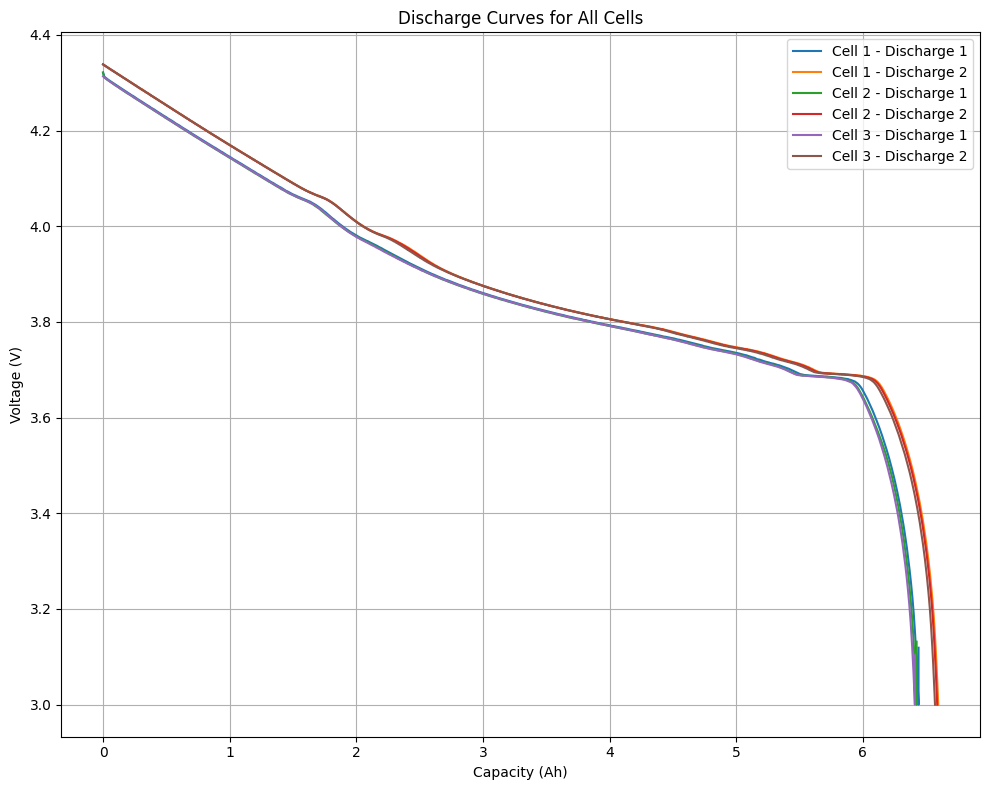

In [25]:
plt.figure(figsize=(10, 8))
plt.plot(discharge1_1['Capacity (Ah)'], discharge1_1['Voltage (V)'], label='Cell 1 - Discharge 1')
plt.plot(discharge2_1['Capacity (Ah)'], discharge2_1['Voltage (V)'], label='Cell 1 - Discharge 2')
plt.plot(discharge1_2['Capacity (Ah)'], discharge1_2['Voltage (V)'], label='Cell 2 - Discharge 1')
plt.plot(discharge2_2['Capacity (Ah)'], discharge2_2['Voltage (V)'], label='Cell 2 - Discharge 2')
plt.plot(discharge1_3['Capacity (Ah)'], discharge1_3['Voltage (V)'], label='Cell 3 - Discharge 1')
plt.plot(discharge2_3['Capacity (Ah)'], discharge2_3['Voltage (V)'], label='Cell 3 - Discharge 2')
plt.xlabel('Capacity (Ah)')
plt.ylabel('Voltage (V)')
plt.title('Discharge Curves for All Cells')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

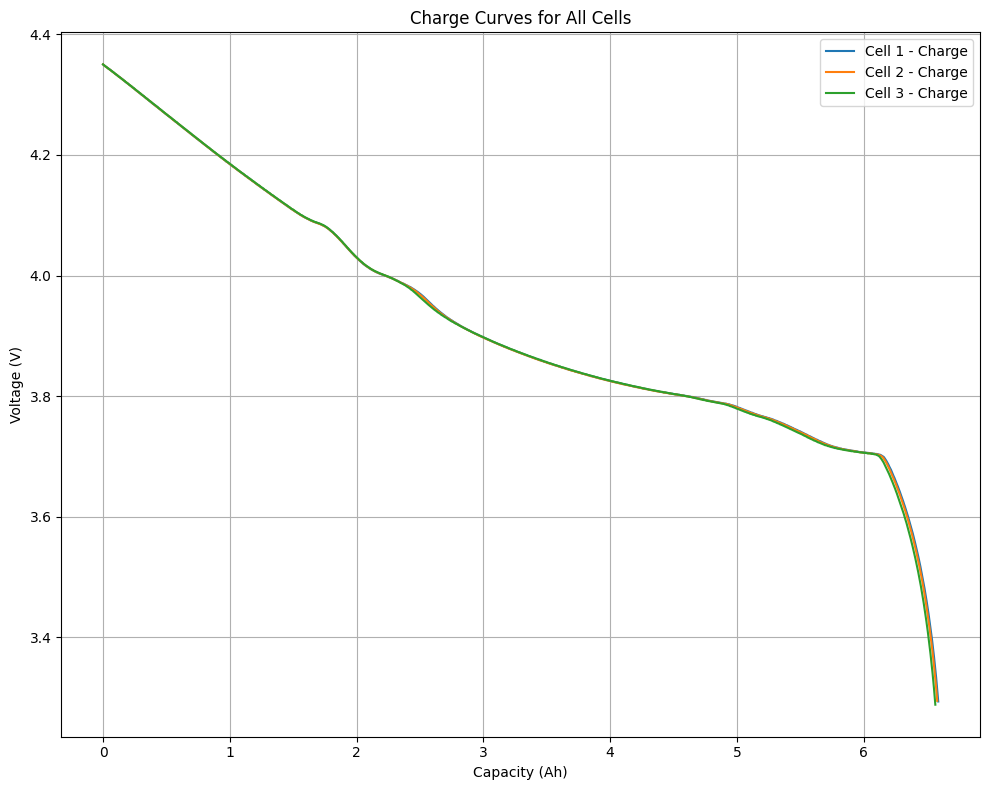

In [26]:
plt.figure(figsize=(10, 8))
plt.plot(charge_1['Capacity (Ah)'], charge_1['Voltage (V)'], label='Cell 1 - Charge')
plt.plot(charge_2['Capacity (Ah)'], charge_2['Voltage (V)'], label='Cell 2 - Charge')
plt.plot(charge_3['Capacity (Ah)'], charge_3['Voltage (V)'], label='Cell 3 - Charge')
plt.xlabel('Capacity (Ah)')
plt.ylabel('Voltage (V)')
plt.title('Charge Curves for All Cells')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

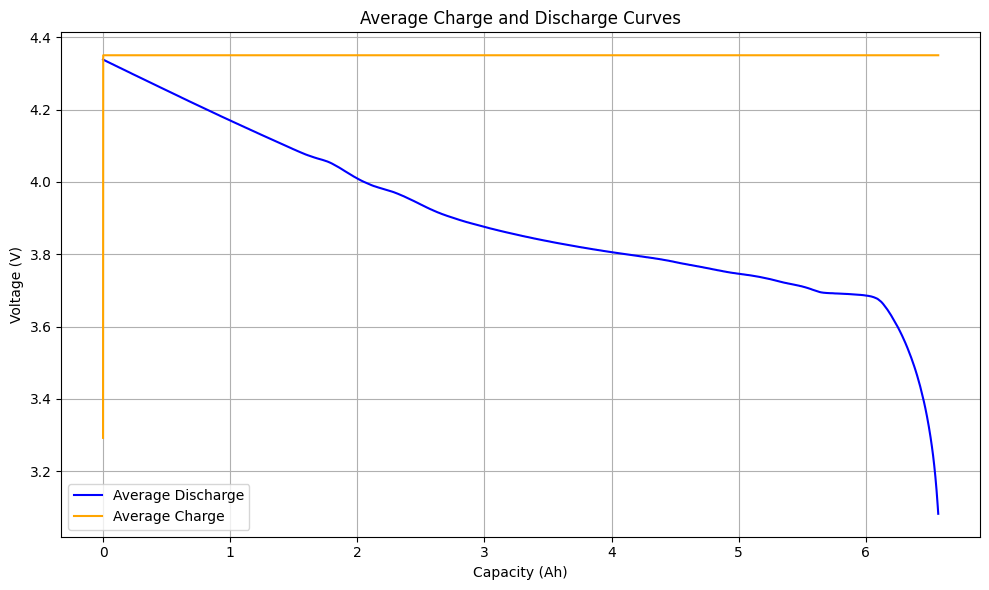

In [27]:
# Calculate average voltage for charge and discharge curves across all three cells
charge_avg = (c1_interp + c2_interp + c3_interp) / 3
discharge_avg = (d1_interp + d2_interp + d3_interp) / 3

plt.figure(figsize=(10, 6))
plt.plot(common_capacity, discharge_avg, label='Average Discharge', color='blue')
plt.plot(common_capacity, charge_avg, label='Average Charge', color='orange')
plt.xlabel('Capacity (Ah)')
plt.ylabel('Voltage (V)')
plt.title('Average Charge and Discharge Curves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

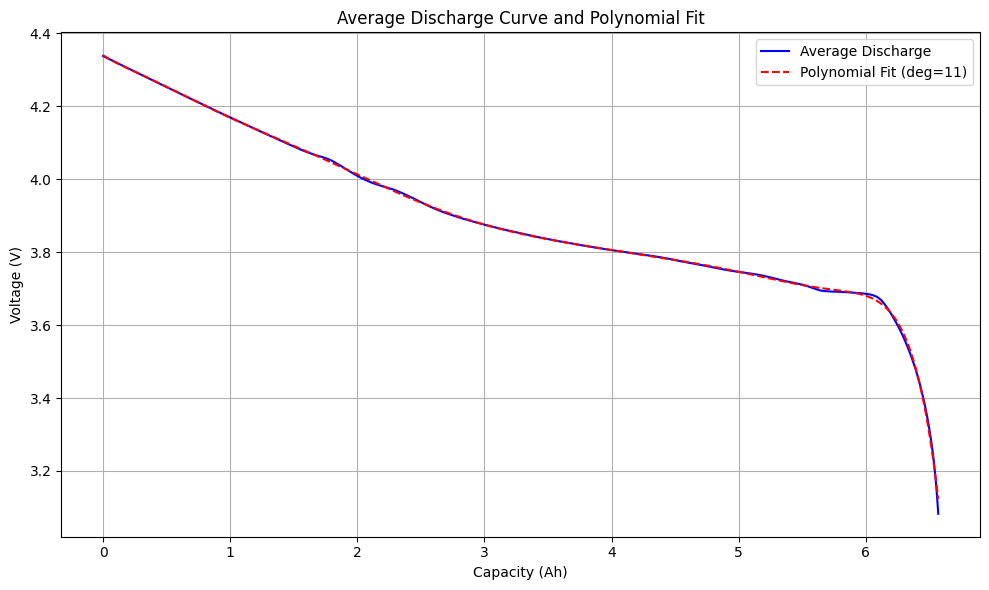

Discharge Polynomial Coefficients: [-7.12056796e-06  2.37972488e-04 -3.44348644e-03  2.82070308e-02
 -1.43451458e-01  4.67151227e-01 -9.69992761e-01  1.24260517e+00
 -9.18975348e-01  3.53732685e-01 -2.27406045e-01  4.34016442e+00]


In [28]:
# Fit a polynomial to the average discharge curve (discharge_avg vs common_capacity)
degree_discharge = 11  # You can adjust the degree as needed
discharge_poly = np.poly1d(np.polyfit(common_capacity, discharge_avg, degree_discharge))

# Generate fitted values for plotting or further analysis
discharge_fitted = discharge_poly(common_capacity)

plt.figure(figsize=(10, 6))
plt.plot(common_capacity, discharge_avg, label='Average Discharge', color='blue')
plt.plot(common_capacity, discharge_fitted, label='Polynomial Fit (deg=11)', color='red', linestyle='--')
plt.xlabel('Capacity (Ah)')
plt.ylabel('Voltage (V)')
plt.title('Average Discharge Curve and Polynomial Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("Discharge Polynomial Coefficients:", discharge_poly.coefficients)

In [21]:
# Adjust discharge2_1, discharge2_2, discharge2_3
for df in [discharge2_1, discharge2_2, discharge2_3]:
    df['Capacity (Ah)'] = df['Capacity (Ah)'] - df['Capacity (Ah)'].iloc[0]

# Adjust charge_1, charge_2, charge_3 so capacity goes from max to 0
for df in [charge_1, charge_2, charge_3]:
    df['Capacity (Ah)'] = df['Capacity (Ah)'].max() - df['Capacity (Ah)']

In [22]:
# Create a common capacity grid based on the minimum and maximum capacity across all three cells
common_capacity = np.linspace(
    max(discharge2_1['Capacity (Ah)'].min(), discharge2_2['Capacity (Ah)'].min(), discharge2_3['Capacity (Ah)'].min()),
    min(discharge2_1['Capacity (Ah)'].max(), discharge2_2['Capacity (Ah)'].max(), discharge2_3['Capacity (Ah)'].max()),
    5000
)

# Interpolate discharge and charge voltages to the common capacity grid for each cell
d1_interp = np.interp(common_capacity, discharge2_1['Capacity (Ah)'], discharge2_1['Voltage (V)'])
d2_interp = np.interp(common_capacity, discharge2_2['Capacity (Ah)'], discharge2_2['Voltage (V)'])
d3_interp = np.interp(common_capacity, discharge2_3['Capacity (Ah)'], discharge2_3['Voltage (V)'])

c1_interp = np.interp(common_capacity, charge_1['Capacity (Ah)'], charge_1['Voltage (V)'])
c2_interp = np.interp(common_capacity, charge_2['Capacity (Ah)'], charge_2['Voltage (V)'])
c3_interp = np.interp(common_capacity, charge_3['Capacity (Ah)'], charge_3['Voltage (V)'])

# Average voltage for each cell at each capacity point (discharge2 and charge only)
v1 = (d1_interp + c1_interp) / 2
v2 = (d2_interp + c2_interp) / 2
v3 = (d3_interp + c3_interp) / 2

# Average voltage across all three cells
v_avg = (v1 + v2 + v3) / 3

# Create a DataFrame for the average OCV curve
ocv_average = pd.DataFrame({
    'Capacity (Ah)': common_capacity,
    'Voltage (V)': v_avg
})

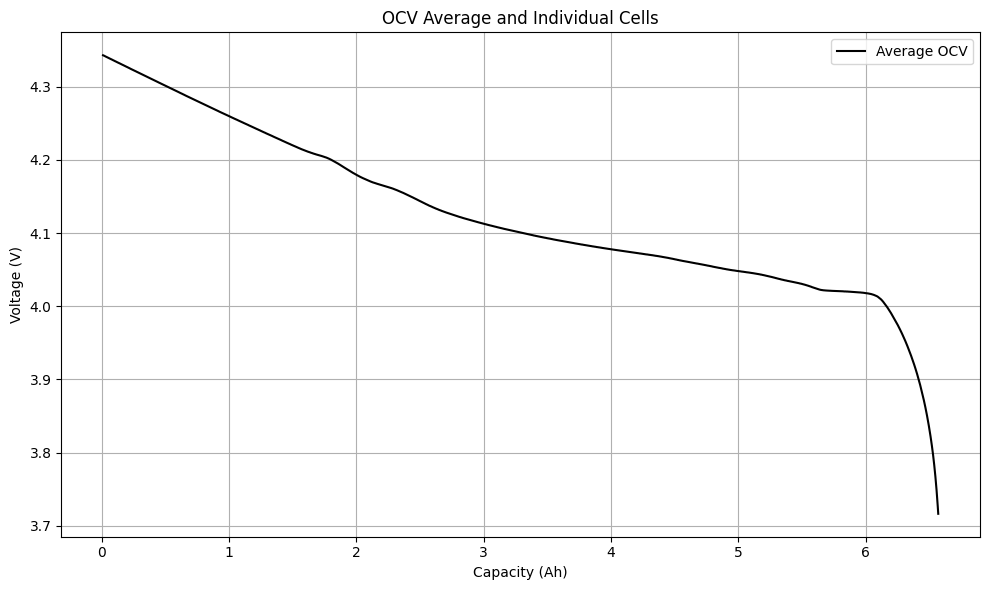

In [23]:
plt.figure(figsize=(10, 6))
ocv_trimmed = ocv_average[ocv_average['Capacity (Ah)'] >= 0.01]

plt.plot(ocv_trimmed['Capacity (Ah)'], ocv_trimmed['Voltage (V)'], label='Average OCV', color='black')
plt.xlabel('Capacity (Ah)')
plt.ylabel('Voltage (V)')
plt.title('OCV Average and Individual Cells')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

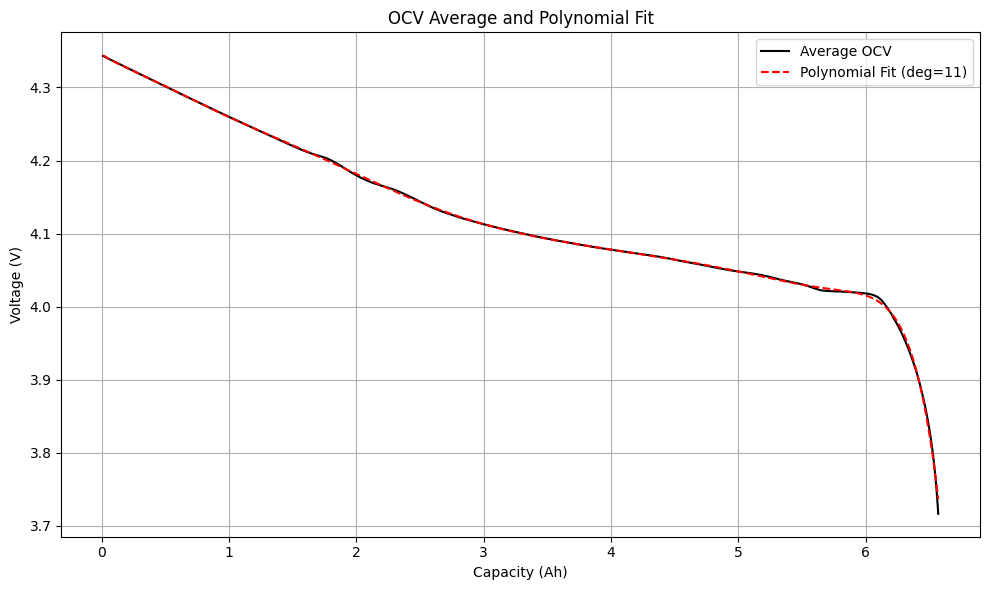

Polynomial Coefficients: [-3.58658616e-06  1.19978636e-04 -1.73805572e-03  1.42567608e-02
 -7.26328916e-02  2.37093879e-01 -4.94001929e-01  6.36254807e-01
 -4.74889466e-01  1.85907107e-01 -1.16270412e-01  4.34533432e+00]


In [24]:
# Fit a polynomial to the OCV trimmed data
degree = 11  # You can adjust the degree as needed
ocv_poly = np.poly1d(np.polyfit(ocv_trimmed['Capacity (Ah)'], ocv_trimmed['Voltage (V)'], degree))

# Generate fitted values for plotting or further analysis
ocv_fitted = ocv_poly(ocv_trimmed['Capacity (Ah)'])

plt.figure(figsize=(10, 6))
plt.plot(ocv_trimmed['Capacity (Ah)'], ocv_trimmed['Voltage (V)'], label='Average OCV', color='black')
plt.plot(ocv_trimmed['Capacity (Ah)'], ocv_fitted, label='Polynomial Fit (deg=11)', color='red', linestyle='--')
plt.xlabel('Capacity (Ah)')
plt.ylabel('Voltage (V)')
plt.title('OCV Average and Polynomial Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("Polynomial Coefficients:", ocv_poly.coefficients)


In [31]:
print(ocv_trimmed['Capacity (Ah)'].iloc[-1])

6.569257
